In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from utils import *

datadir = '/Users/schwarz/Documents/projects/element/research/rto_nime22/user_data/'

# array [participants] of array [fam, exp] data file name
datafile =  [ ['P1/2022-07-28T15-09-33.830Z.txt', 'P1/2022-07-28T15-10-29.580Z.txt' ],
              ['P2/2022-08-30T16-37-21.326Z.txt', 'P2/2022-08-30T16-38-30.262Z.txt' ],
              ['P3/2022-09-01T17-04-31.275Z.txt', 'P3/2022-09-01T17-07-04.283Z.txt' ],
              ['P4/2022-09-02T12-19-35.310Z.txt', 'P4/2022-09-02T12-21-02.022Z.txt' ],
              ['', 'P5/2022-09-08T09-43-19.972Z.txt' ],
            ]

# Data Exploration

In [ ]:
# new load method
participant = 5
res0, seg0 = read_log(datadir + datafile[participant - 1][0]) 
res,  seg  = read_log(datadir + datafile[participant - 1][1])
seg0 = pd.DataFrame(seg0)
seg  = pd.DataFrame(seg)
seg

,then,fl,segment_id,worker_0,best_id,min_dtw,min_dtw_pond,model_length,worker_1,avg_dtw,dtw,logtype,random_novelty,condition
0,4.232862e+03,47,0,3.918435e+03,0,0.000000,0.000000,0,3.918519e+03,0.000000,False,segment,1.149,c1
1,4.628907e+03,39,1,4.313871e+03,1,110.089617,2.560224,1,4.316567e+03,1.280112,2,segment,0.281,c1
2,6.319330e+03,26,2,6.004375e+03,2,20.566801,0.563474,2,6.006008e+03,1.041233,0.541161,segment,0.963,c1
3,6.526172e+03,21,3,6.211175e+03,3,41.721482,1.775382,3,6.213163e+03,1.224770,1.44956,segment,0.839,c1
4,6.778079e+03,25,4,6.463128e+03,4,25.170730,0.786585,4,6.464460e+03,1.137133,0.691727,segment,0.839,c1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,8.390109e+05,12,1442,8.387006e+05,1442,6.368923,0.424595,1067,8.387653e+05,0.568225,0.74723,segment,-99.000,c2
1298,8.402558e+05,31,1443,8.399408e+05,1443,5.783572,0.214206,1068,8.401134e+05,0.567953,0.377155,segment,-99.000,c2
1299,1.353636e+06,20,1444,1.353321e+06,1444,6.502018,0.325101,1069,1.353453e+06,0.567766,0.572597,segment,-99.000,c2
1300,1.354051e+06,27,1445,1.353736e+06,1445,5.399359,0.229760,1070,1.353907e+06,0.567506,0.404859,segment,-99.000,c2


<AxesSubplot:>

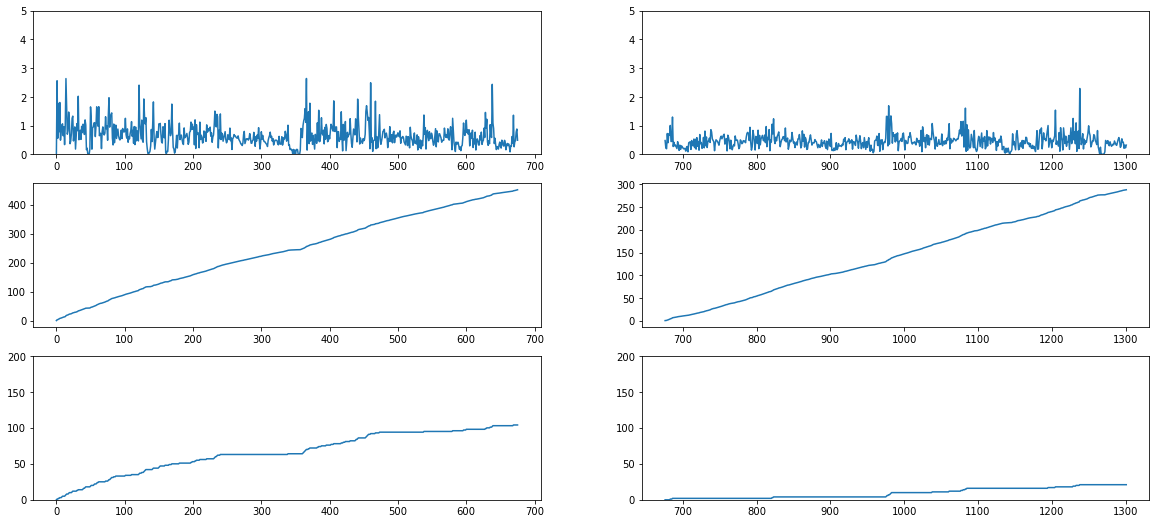

In [7]:
#nov0 = select(seg0, condition='c0')
nov1 = select(seg, condition='c1')
nov2 = select(seg, condition='c2')

#ymax = max((nov1['min_dtw_pond'] > 1).cumsum(), (nov2['min_dtw_pond'] > 1).cumsum())
ymax = 200
thresh = 1

plt.figure(figsize=(20, 9)) 
plt.subplot(3, 2, 1)
nov1['min_dtw_pond'].plot(ylim=(0, 5))
plt.subplot(3, 2, 2)
nov2['min_dtw_pond'].plot(ylim=(0, 5))

plt.subplot(3, 2, 3)
nov1['min_dtw_pond'].cumsum().plot()
plt.subplot(3, 2, 4)
nov2['min_dtw_pond'].cumsum().plot()

plt.subplot(3, 2, 5)
(nov1['min_dtw_pond'] > thresh).cumsum().plot(ylim=(0, ymax))
plt.subplot(3, 2, 6)
(nov2['min_dtw_pond'] > thresh).cumsum().plot(ylim=(0, ymax))

(array([ 16.,  64.,  84.,  94., 146.,  90.,  50.,  34.,  18.,   9.,   9.,
          2.,   2.,   4.,   0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <BarContainer object of 50 artists>)

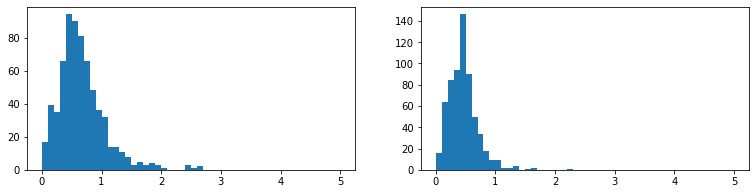

In [10]:
plt.figure(figsize=(20, 3)) 
#plt.subplot(1, 3, 1)
#plt.hist(nov0['min_dtw_pond'], 50, range=(0, 5))
plt.subplot(1, 3, 2)
plt.hist(nov1['min_dtw_pond'], 50, range=(0, 5))
plt.subplot(1, 3, 3)
plt.hist(nov2['min_dtw_pond'], 50, range=(0, 5))

# Comparative Result Graph

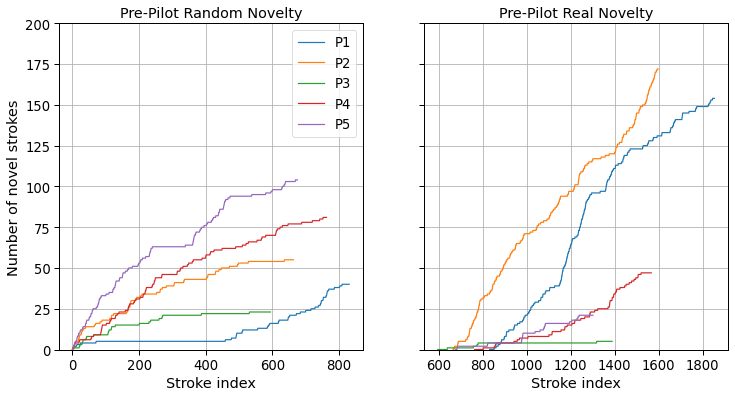

In [32]:
sns.set_context('paper', font_scale=1.5)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_title('Pre-Pilot Random Novelty')
axs[1].set_title('Pre-Pilot Real Novelty')

ymax = 200
thresh = 1

for participant in range(1, 6):
    res,  seg  = read_log(datadir + datafile[participant - 1][1])
    seg  = pd.DataFrame(seg)

    nov1 = select(seg, condition='c1')
    nov2 = select(seg, condition='c2')

    (nov1['min_dtw_pond'] > thresh).cumsum().plot(ylim=(0, ymax), ax=axs[0], label='P{}'.format(participant))
    (nov2['min_dtw_pond'] > thresh).cumsum().plot(ylim=(0, ymax), ax=axs[1], label='P{}'.format(participant))
    
for ax in axs:
    #ax.set_xlim([0, 370])
    #ax.set_ylim([0, 100])
    ax.set_xlabel('Stroke index')
    ax.set_ylabel('Number of novel strokes')
    ax.grid()

axs[0].legend()
axs[1].set_ylabel('')
axs[1].set_yticklabels([]);

fig.savefig('fig/prepilot-novelty.png')
fig.savefig('fig/prepilot-novelty.pdf')